In [18]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
data_tumor = "BRCA_Primary_Tumor.chr19.tsv"
data_normal = "BRCA_Solid_Tissue_Normal.chr19.tsv"

In [3]:
# read data
tumor = pd.read_csv(data_tumor, delimiter="\t")
tumor = tumor.reset_index().rename(columns={"index":"location"})
tumor

,location,Unnamed: 0,6005486021_R01C01,6005486021_R02C01,6005486021_R03C01,6005486021_R04C01,6005486021_R05C01,6005486021_R06C01,6005486021_R01C02,6005486021_R02C02,...,6285633072_R02C02,6285633072_R04C02,6285633072_R03C02,6285633072_R05C02,7786923102_R06C02,7796806109_R01C01,7796806109_R05C01,7796806109_R06C01,7796806109_R04C01,7796806109_R02C01
0,0,cg15886596,10,10,7,7,7,7,8,6,...,13,14,11,12,13,13,12,11,12,12
1,1,cg12261117,61,44,40,30,39,30,37,38,...,45,50,41,41,74,71,72,52,63,48
2,2,cg18110419,442,617,652,689,658,636,607,514,...,665,565,608,596,701,488,625,639,701,508
3,3,cg25433760,521,976,960,979,950,971,977,969,...,965,964,953,958,962,973,976,978,973,974
4,4,cg23278040,162,486,760,224,818,561,549,715,...,462,207,54,270,366,384,788,434,592,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,24666,cg23652859,66,702,683,724,654,677,580,648,...,396,848,370,444,491,424,324,594,446,288
24667,24667,cg03567148,962,990,974,969,991,978,981,979,...,946,934,926,950,973,911,928,957,955,952
24668,24668,cg13678479,959,964,972,972,970,966,959,969,...,967,954,920,968,948,941,939,955,943,950
24669,24669,cg05617300,990,988,990,987,988,988,989,988,...,982,986,985,984,980,985,984,987,983,980


In [4]:
tumor_patients = tumor.columns[2:]

In [5]:
normal = pd.read_csv(data_normal, delimiter="\t")
normal = normal.reset_index().rename(columns={"index":"location"})
normal

,location,Unnamed: 0,6005486025_R04C01,6005486025_R02C01,6005486025_R03C01,6005486025_R01C01,6005486025_R06C01,6005486011_R03C01,6005486011_R04C01,6005486011_R01C02,...,6042324006_R05C02,6057833134_R03C02,6057833134_R04C02,6057833159_R05C02,6057833166_R01C01,6057833166_R03C01,6285633051_R02C01,6057833155_R06C02,6057833101_R02C01,6057833101_R06C02
0,0,cg15886596,10,8,9,9,9,7,7,8,...,8,10,12,11,12,11,9,11,10,10
1,1,cg12261117,56,38,39,59,48,37,43,46,...,72,57,67,62,67,61,40,80,65,61
2,2,cg18110419,731,665,662,698,672,734,702,661,...,928,653,710,686,640,627,767,733,684,668
3,3,cg25433760,949,958,951,964,958,971,965,970,...,899,943,959,958,932,954,974,940,941,971
4,4,cg23278040,309,267,778,625,452,600,636,598,...,449,286,512,562,558,367,692,295,288,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,24666,cg23652859,91,58,190,303,74,221,283,472,...,127,100,234,195,168,315,255,104,241,377
24667,24667,cg03567148,915,862,938,971,898,968,970,947,...,752,814,892,868,908,892,951,805,827,956
24668,24668,cg13678479,973,948,966,964,978,969,993,973,...,938,946,952,957,947,954,971,948,960,953
24669,24669,cg05617300,984,988,984,986,988,991,991,990,...,978,976,978,984,979,976,987,980,980,981


In [7]:
normal_patients = normal.columns[2:]

# data distribution

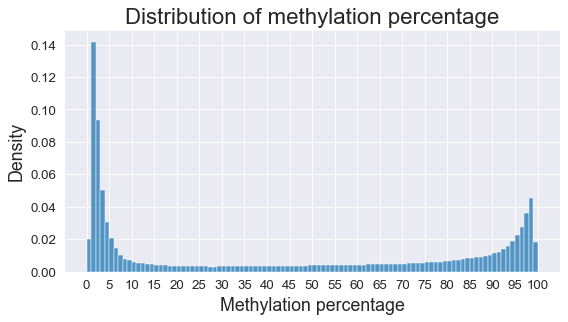

In [51]:
figure(figsize=(8, 4), dpi=80)

plt.title("Distribution of methylation percentage", size=20)
plt.ylabel("Density", fontsize=16)
plt.xlabel("Methylation percentage", fontsize=16)
plt.xticks(range(0,101,5), fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(cells, bins=100, stat="density")

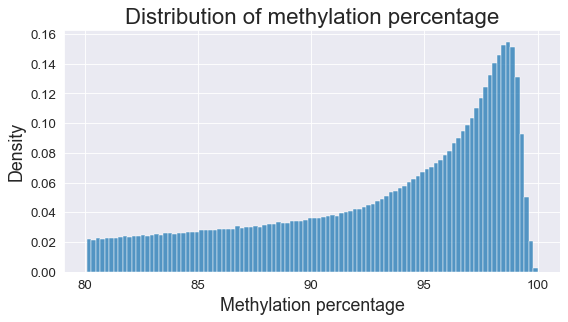

In [52]:
sns.set_style("darkgrid")
figure(figsize=(8, 4), dpi=80)
cells = pd.Series(normal[normal_patients].values.flatten()/999*100)
plt.title("Distribution of methylation percentage", size=20)
plt.ylabel("Density", fontsize=16)
plt.xlabel("Methylation percentage", fontsize=16)
plt.xticks(range(0,101,5), fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(cells[cells >80], bins=100, stat="density")

In [ ]:
sns.set_style("darkgrid")
figure(figsize=(8, 4), dpi=80)
cells = pd.Series(normal[normal_patients].values.flatten()/999*100)
plt.title("Distribution of methylation percentage", size=20)
plt.ylabel("Density", fontsize=16)
plt.xlabel("Methylation percentage", fontsize=16)
plt.xticks(range(0,101,5), fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(cells[cells <20], bins=100, stat="density")

In [ ]:
sns.set_style("darkgrid")
figure(figsize=(8, 4), dpi=80)
sns.histplot(normal[normal_patients].values.flatten(), bins=100)

# plot of percentage

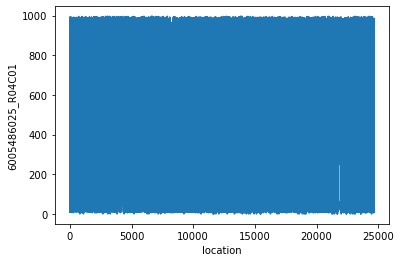

In [15]:
sns.lineplot(data=normal,x="location", y="6005486025_R04C01")

# plot moving average

In [57]:
def min_max_norm(x):
    return (x-x.min())/(x.max()-x.min())

def add_moving_avg_features(df, features, sample_size, window_length):
    sampled_patients = pd.Series(features).sample(sample_size)
    df["std"] = df.loc[:,sampled_patients].std(axis=1)
    df["mean"] = df.loc[:,sampled_patients].mean(axis=1)
    #df["SMA_std"] = df["std"].rolling(window_length).std()
    df["SMA_mean"] = df["mean"].rolling(window_length).mean()
    #df["SMA_std_norm"] = min_max_norm(df["SMA_std"])
    #df["SMA_median_norm"] = min_max_norm(df["SMA_median"])
    return df


In [59]:
normal

,location,Unnamed: 0,6005486025_R04C01,6005486025_R02C01,6005486025_R03C01,6005486025_R01C01,6005486025_R06C01,6005486011_R03C01,6005486011_R04C01,6005486011_R01C02,...,6057833159_R05C02,6057833166_R01C01,6057833166_R03C01,6285633051_R02C01,6057833155_R06C02,6057833101_R02C01,6057833101_R06C02,std,mean,SMA_mean
0,0,cg15886596,10,8,9,9,9,7,7,8,...,11,12,11,9,11,10,10,1.527525,8.333333,NaN
1,1,cg12261117,56,38,39,59,48,37,43,46,...,62,67,61,40,80,65,61,6.350853,43.333333,NaN
2,2,cg18110419,731,665,662,698,672,734,702,661,...,686,640,627,767,733,684,668,82.512625,691.333333,NaN
3,3,cg25433760,949,958,951,964,958,971,965,970,...,958,932,954,974,940,941,971,10.392305,949.000000,NaN
4,4,cg23278040,309,267,778,625,452,600,636,598,...,562,558,367,692,295,288,669,48.569538,498.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,24666,cg23652859,91,58,190,303,74,221,283,472,...,195,168,315,255,104,241,377,52.003205,246.333333,333.261111
24667,24667,cg03567148,915,862,938,971,898,968,970,947,...,868,908,892,951,805,827,956,20.074860,913.000000,333.224444
24668,24668,cg13678479,973,948,966,964,978,969,993,973,...,957,947,954,971,948,960,953,11.846237,967.666667,333.342222
24669,24669,cg05617300,984,988,984,986,988,991,991,990,...,984,979,976,987,980,980,981,2.886751,987.666667,333.608889


(array([30., 35., 40., 45., 50., 55., 60.]),
 <a list of 7 Text major ticklabel objects>)

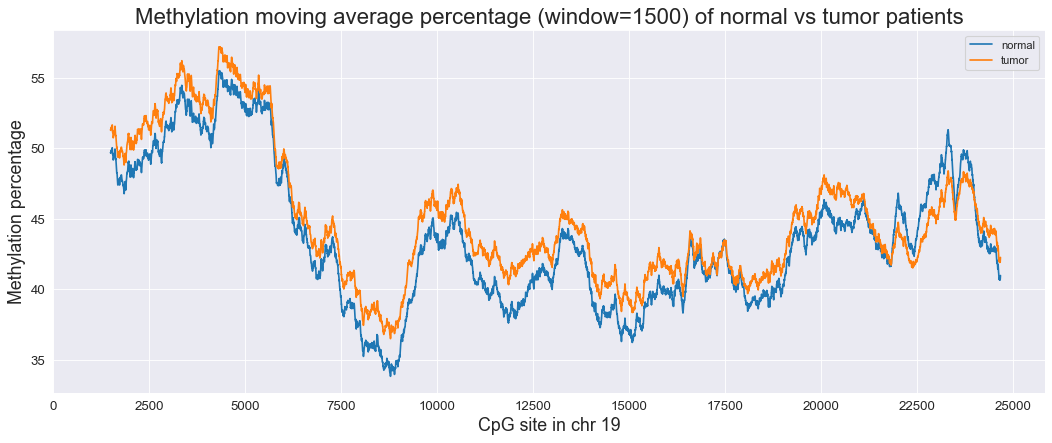

In [79]:
sns.set_style("darkgrid")
figure(figsize=(16, 6), dpi=80)

normal = add_moving_avg_features(normal, normal_patients, 97, 1500)
tumor = add_moving_avg_features(tumor, tumor_patients, 720, 1500)
normal["SMA_mean"] = normal["SMA_mean"]/999*100
tumor["SMA_mean"] = tumor["SMA_mean"]/999*100
sns.lineplot(data=normal, x="location", y="SMA_mean", label="normal")
sns.lineplot(data=tumor, x="location", y="SMA_mean", label="tumor")

plt.title("Methylation moving average percentage (window=1500) of normal vs tumor patients", size=20)
plt.ylabel("Methylation percentage", fontsize=16)
plt.xlabel("CpG site in chr 19", fontsize=16)
plt.xticks(range(0,26000,2500), fontsize=12)
plt.yticks(fontsize=12)

# Plot differences in Average

In [74]:
squre_diff = difference.to_frame("avg_difference").reset_index().drop(columns="index").reset_index()
squre_diff["avg_difference"] = squre_diff["avg_difference"]/(n+1)
#sns.lineplot(data=normal, x="location", y="SMA_median_norm")

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 <a list of 8 Text major ticklabel objects>)

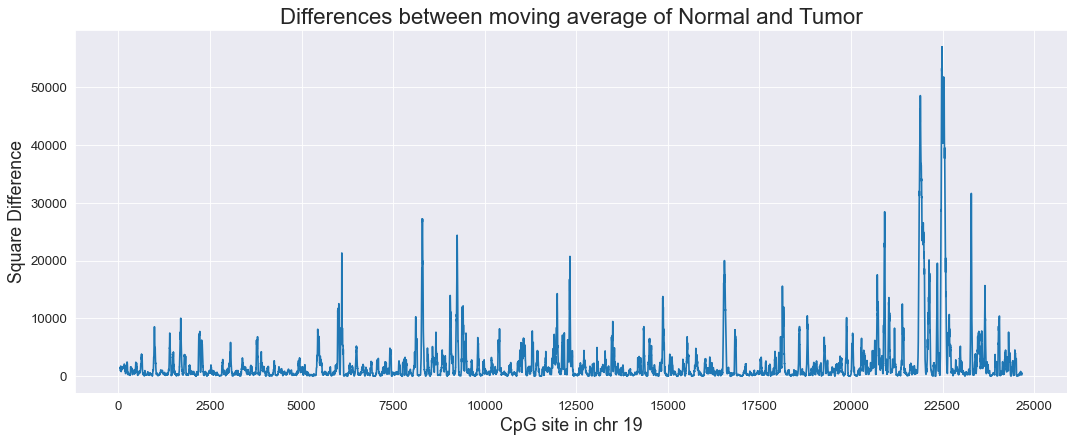

In [82]:

figure(figsize=(16, 6), dpi=80)
sns.lineplot(data=squre_diff, x="index", y="avg_difference")
plt.title("Differences between moving average of Normal and Tumor", size=20)
plt.ylabel("Square Difference", fontsize=16)
plt.xlabel("CpG site in chr 19", fontsize=16)
plt.xticks(range(0,26000,2500), fontsize=12)
plt.yticks(fontsize=12)